Preliminary exploration of Wisconsin breast cancer dataset. In this script, the features will be standardized and K-nearest neighbor (KNN) clustering will be applied. 

In [396]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [397]:
# Import dataset
cancer = pd.read_csv('../data/raw/breast.csv')

# Changing the names of the columns to improve their understanding
new_columns = ['ID', 'Diagnosis']
for i in range (30):       
       if cancer.columns[i+2][-1:] == '1': 
               column_type = 'mean'
       elif cancer.columns[i+2][-1:] == '2': 
               column_type = 'se'
       else: 
               column_type = 'worst'
       temp = cancer.columns[i+2][:-1] + '_' + column_type
       new_columns.append(temp)

cancer.columns = new_columns
cancer.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [398]:
# Standardize features using the z-score method
scaler = StandardScaler()

features = cancer.columns[2:]

standardized_cancer = scaler.fit_transform(cancer[features])

# Convert the standardized data back to a DataFrame
standardized_cancer = pd.DataFrame(standardized_cancer, columns=features)

standardized_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [399]:
# Split the dataset into test and training sets at 25-75 split.

X_train, X_test, Y_train, Y_test = train_test_split(standardized_cancer, 
                                                    cancer['Diagnosis'], 
                                                    test_size=0.25, random_state=42)

# Verify shapes
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(426, 30) (143, 30)
(426,) (143,)


In [400]:
# Set up a grid search to identify the optimum number of k between 1 to 100 in knn classification

knn = KNeighborsClassifier()

parameter_grid = {
    "n_neighbors": range(1, 100),
}

cancer_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

cancer_tune_grid.fit(
    X_train,
    Y_train
)

accuracies_grid = pd.DataFrame(cancer_tune_grid.cv_results_)

cancer_tune_grid.best_params_['n_neighbors']

5

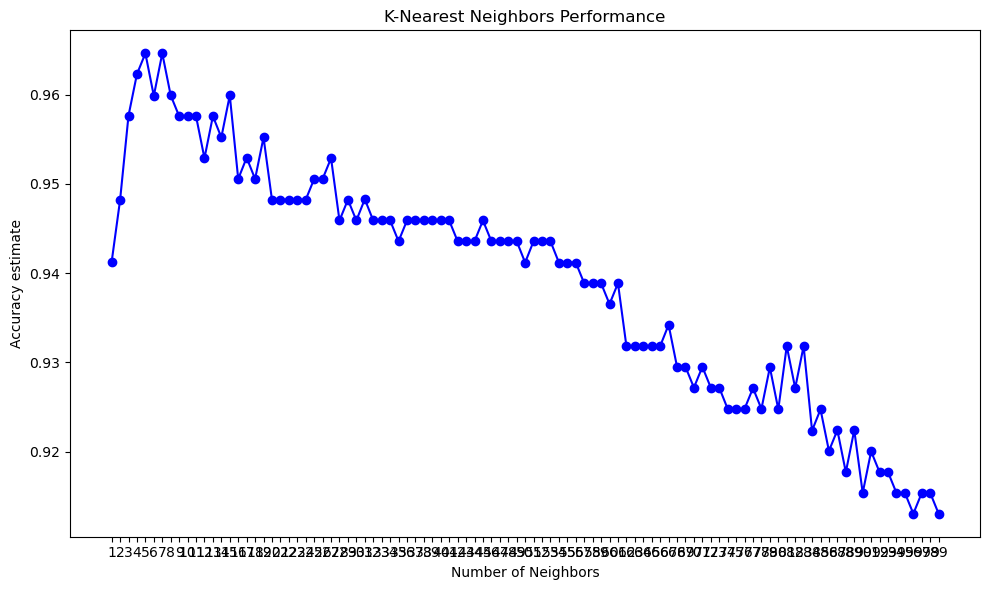

In [401]:
# Visualize results of the grid search

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')

# Add tick marks at every integer for the x-axis
plt.xticks(np.arange(min(accuracies_grid['param_n_neighbors']), max(accuracies_grid['param_n_neighbors']) + 1, 1))

plt.tight_layout()
plt.show()

As shows both programatically and visually, the optimum number of neighbors is 5. 

Next, a new KNN model is constructed with the optimum number of neighbors using the training data. Then, this new model will be tested on the test dataset to evaluate accuracy. 

In [402]:
# Refit the KNN model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=cancer_tune_grid.best_params_['n_neighbors'])
knn_best.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn_best.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report (precision, recall, F1-score)
print(classification_report(Y_test, Y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Test Accuracy: 0.958041958041958
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        89
           M       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
[[86  3]
 [ 3 51]]
